### Strategy
***Entry:***
To enter a trade, stock needs to gap down and be below the low of the previous day when it opens.

***Taking Profits:***
Take profit on the first profitable openining. This means wait to sell until the stock has actually opened higher than the latest entry.


***Stop Losses:***
You have the option to put in a stop-loss order to prevent losses.


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt 
plt.style.use('seaborn')

In [11]:
#### GET DATA ####
TICKER = "TSLA"

df = yf.download(TICKER, 
                 start="2019-01-01", 
                 end="2022-01-01", 
                 auto_adjust=True)


[*********************100%***********************]  1 of 1 completed


In [16]:
def backtest(df,stop_loss=100):
    i = 0
    in_position = False

    entry_price = 0
    exit_dates = []
    profits = []
    winners = 0
    losers = 0
    for _ in df.itertuples(index=False):
        i += 1
        if i < len(df.index):
            
            # If not in position - Check for Entry 
            if not in_position:
                if df['Low'][i-1] > df['Open'][i]:
                    entry_price = df['Open'][i]
                    in_position=True
                    
            # If in position - Check for Take Profit or Stop Loss
            elif in_position:
                if df['Open'][i] > entry_price or df['Low'][i] <= entry_price - entry_price*stop_loss/100:
                    profit = ((df['Open'][i] - entry_price) * 100) / entry_price
                    profits.append(profit)
                    exit_dates.append(df.index[i])
                    in_position=False
                    
    return np.array(profits),np.array(exit_dates),sum(profits)
                
        

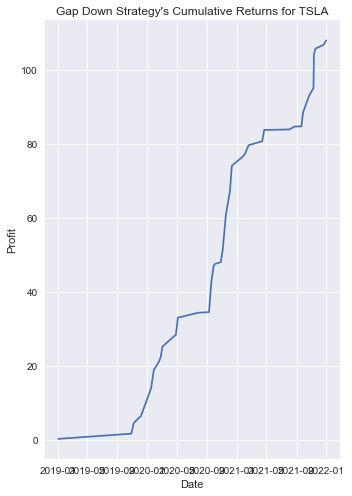

Total Profit: 107.98%
Winners: 41
Losers:0
Win Rate: 100.0%


In [17]:
# Calculate
profits,exit_dates, total_profit = backtest(df)
winners = len(profits[profits > 0])
losers = len(profits[profits < 0])
cumulative_returns = np.add.accumulate(profits)

# Plot
plt.title(f"Gap Down Strategy's Cumulative Returns for {TICKER}") 
plt.xlabel("Date")
plt.ylabel("Profit") 
plt.rcParams["figure.figsize"] = [11,6]
text = f'Total Profit: {round(total_profit,2)}%\nWinners: {winners}\nLosers:{losers}\nWin Rate: {round(winners*100/(winners+losers),2)}%'
plt.plot(exit_dates,cumulative_returns)
plt.show()
print(text)

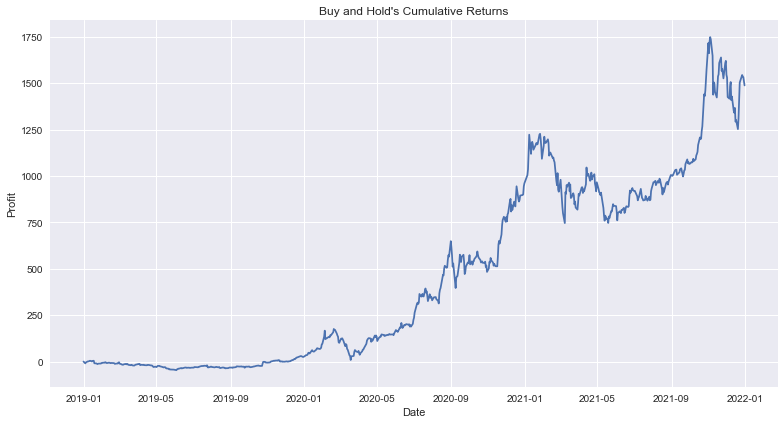

Buy and Hold Total Profit: 1487.71%


In [18]:
#Calculate and plot Buy and Hold Returns for the same period

buy_and_hold_total_return = ((df["Close"][len(df.index)-1] - df["Close"][0]) * 100) / df["Close"][0]
df["return"] = (df['Close'] - df['Close'][0])*100 / df['Close'][0]

returns = df['return'].to_numpy()

plt.xlabel("Date")
plt.ylabel("Profit") 

plt.rcParams["figure.figsize"] = [11,6]
plt.title("Buy and Hold's Cumulative Returns") 

plt.plot(df.index,returns)
plt.show()

text = f'Buy and Hold Total Profit: {round(buy_and_hold_total_return,2)}%'
print(text)

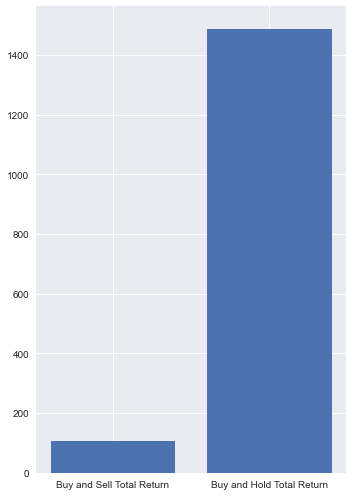

In [19]:

plt.rcParams["figure.figsize"] = [5, 7]
plt.rcParams["figure.autolayout"] = True

data = {'Buy and Sell Total Return': total_profit, 'Buy and Hold Total Return': buy_and_hold_total_return}
names = list(data.keys())
values = list(data.values())

plt.bar(names, values)

plt.show()
